## Analysis of the quality and satisfaction of life of European citizens - Modeling relationships in economic data

### Introduction

The aim of the analysis is to categorize European countries based on selected economic and social measures that may influence or determine the quality of life in a given country, and to examine the factors that influence life satisfaction of young adults. The project aims to answer the following research questions:

* To what extent can the life satisfaction of people aged 25-34 be explained by variables determining well-being, health and access to care, as well as the economic conditions of the country?
* Are life satisfaction and high fertility rates closely related?
* Which European countries that are geographically and culturally similar are characterized by similar assessments of life satisfaction, health status and fertility?


### Data and methods

For people aged 25-34 the data was selected from 2022. Values were downloaded from the Eurostat portal. Below is a description of the selected variables and the abbreviation used in the analysis:

* GDP - GDP per capita
* MED - reported unmet needs for medical examinations because travel or the waiting list is too expensive or too far
* ILC HP - percentage of people who say they have not been happy at all in the last 4 weeks
* ILC_SAT - overall life satisfaction index
* FER - fertility rate
* EMPL - indicator of people not in employment or education
* HLTH - indicator of poor or very poor health

Some variables didn't have values for all countries for a given year, so the gaps were filled with values from previous years. Below is a list of operations performed to fill in the gaps:
Switzerland (empl) value from 2020, Germany (ilc_hp) value from 2018, Iceland (med) from 2019 (ilc_hp) from 2018 (ilc_sat) from 2018 (hlth) from 2019, Montenegro (empl) from 2020 (med) from 2021, <br>
North Macedonia (gdp) from 2021 (med) from 2020 (ilc_hp) from 2018 (ilc_sat) from 2018 (empl) from 2020 (hlth) from 2020, Turkey (med) from 2021 (hlth) from 2019. <br>
In total, 34 countries were included in the analysis.

The following methods were used in the project: Spearman and Pearson correlations, linear regression, cluster analysis using Ward's method and k-means method.

### Packages import and data transformation

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import  set_link_color_palette, linkage, dendrogram, cut_tree
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np 
from scipy import stats
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import statsmodels.api as sm 
import os
from statsmodels.stats.diagnostic import het_white
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
data = pd.read_excel('C:/JupyterLab/EU_citizens_satisfaction/data/raw/Data.xlsx') 
data.head()

,Unnamed: 0,gdp,med.,ilc_hp,ilc_sat,fer,empl,hlth
0,Belgium,37050,0.8,1.0,7.6,0.09275,14.2,2.7
1,Bulgaria,7680,0.9,2.3,6.0,0.09683,19.4,0.9
2,Czechia,18460,0.2,1.4,7.8,0.10641,18.7,2.3
3,Denmark,51660,2.8,1.8,7.3,0.09583,10.7,6.4
4,Germany,36010,0.4,0.8,6.6,0.07671,12.5,3.2


In [3]:
data = data.rename(columns={'Unnamed: 0': 'Country'})
data.head()

,Country,gdp,med.,ilc_hp,ilc_sat,fer,empl,hlth
0,Belgium,37050,0.8,1.0,7.6,0.09275,14.2,2.7
1,Bulgaria,7680,0.9,2.3,6.0,0.09683,19.4,0.9
2,Czechia,18460,0.2,1.4,7.8,0.10641,18.7,2.3
3,Denmark,51660,2.8,1.8,7.3,0.09583,10.7,6.4
4,Germany,36010,0.4,0.8,6.6,0.07671,12.5,3.2


In [4]:
data = data.set_index('Country')
data.head()

,gdp,med.,ilc_hp,ilc_sat,fer,empl,hlth
Country,,,,,,,
Belgium,37050,0.8,1.0,7.6,0.09275,14.2,2.7
Bulgaria,7680,0.9,2.3,6.0,0.09683,19.4,0.9
Czechia,18460,0.2,1.4,7.8,0.10641,18.7,2.3
Denmark,51660,2.8,1.8,7.3,0.09583,10.7,6.4
Germany,36010,0.4,0.8,6.6,0.07671,12.5,3.2


In [5]:
data.to_excel("C:/JupyterLab/EU_citizens_satisfaction/data/processed/data_changed.xlsx", index=False)

### Analysis

#### Boxplots

<Axes: xlabel='gdp'>

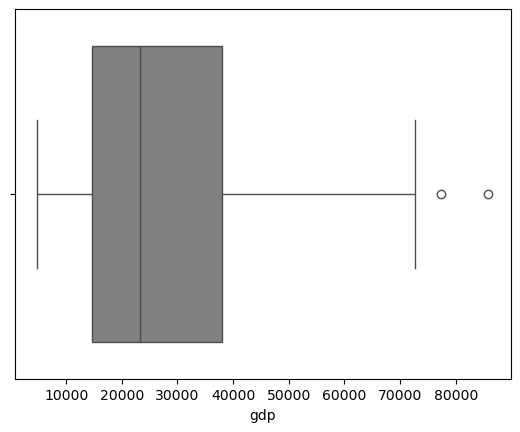

In [6]:
sns.boxplot(x=data['gdp'], color= '.5')

<Axes: xlabel='med.'>

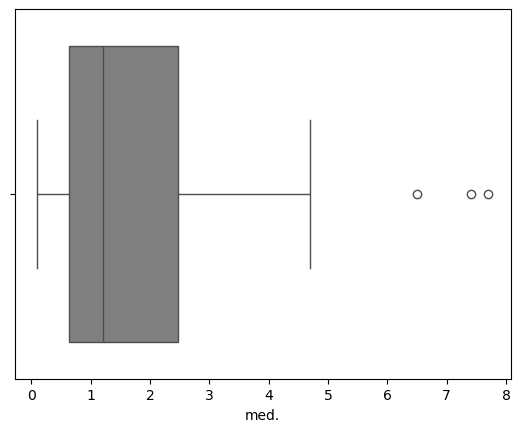

In [7]:
sns.boxplot(x=data['med.'], color= '.5')

<Axes: xlabel='ilc_hp'>

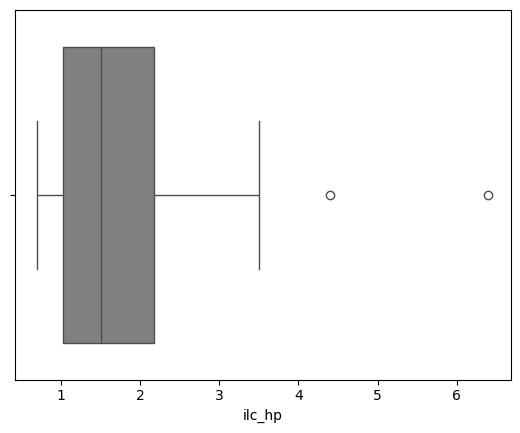

In [8]:
sns.boxplot(x=data['ilc_hp'], color= '.5')

<Axes: xlabel='ilc_sat'>

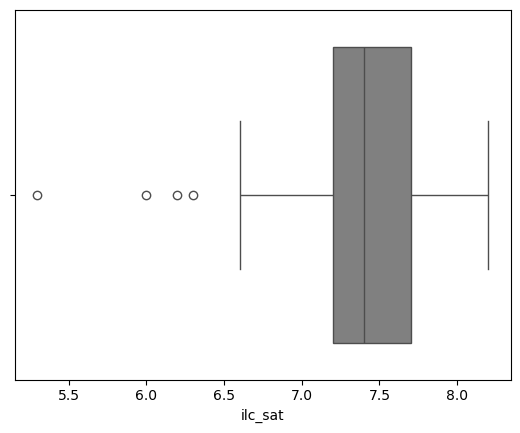

In [9]:
sns.boxplot(x=data['ilc_sat'], color= '.5')

<Axes: xlabel='fer'>

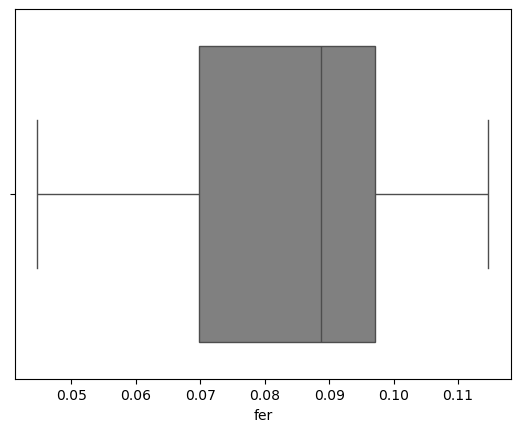

In [10]:
sns.boxplot(x=data['fer'], color= '.5')

<Axes: xlabel='empl'>

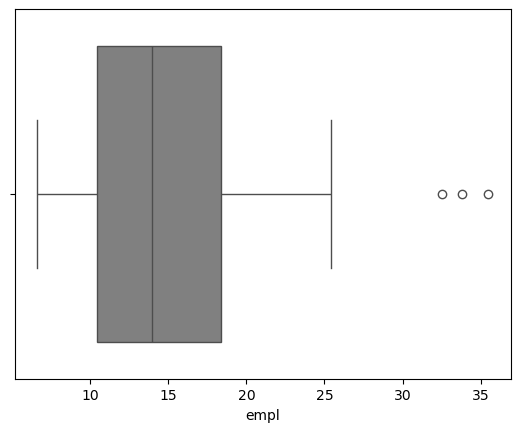

In [11]:
sns.boxplot(x=data['empl'], color= '.5')

<Axes: xlabel='hlth'>

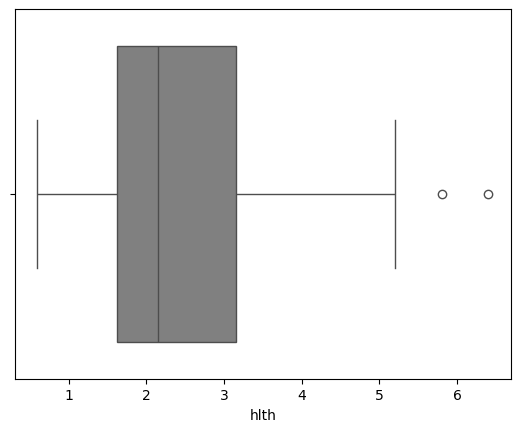

In [12]:
sns.boxplot(x=data['hlth'], color= '.5')

Only the fer variable has no outliers. For med., ilc_sat, and empl, there are more than two outliers, accounting for 8% or 12% of all observations. This may affect the results of analyses sensitive to outliers.

#### Sctatterplots

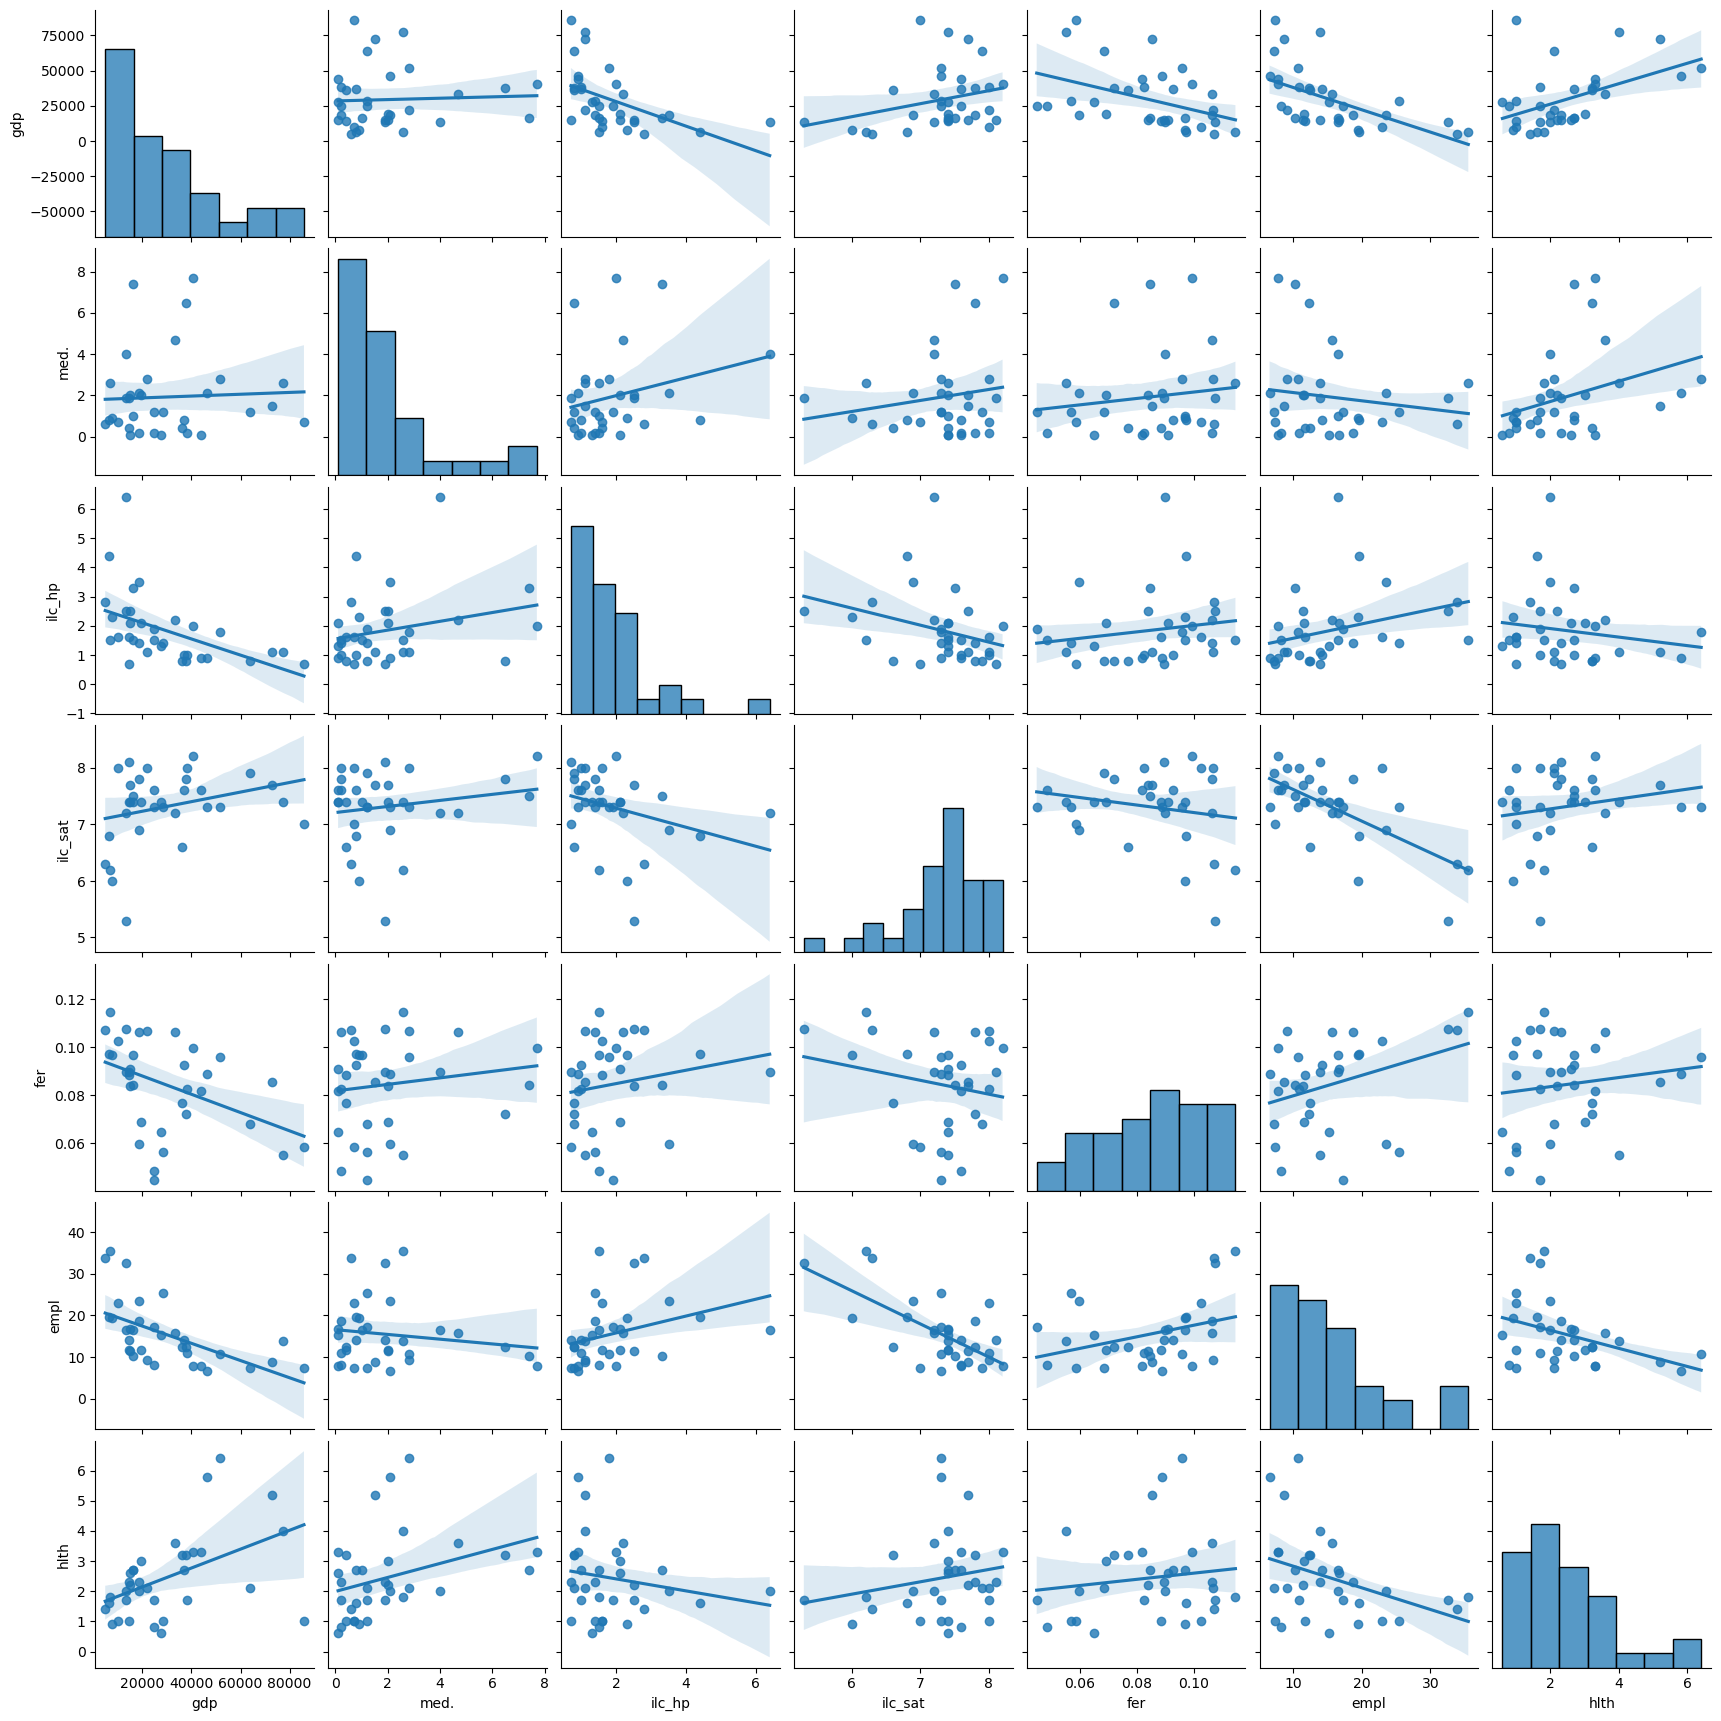

In [13]:
sns.pairplot(data, kind='reg')

In the scatterplots we can also see outliers for many variables. The empl variable appears to be most strongly related to ilc_sat via a linear relationship.

#### Correlations 

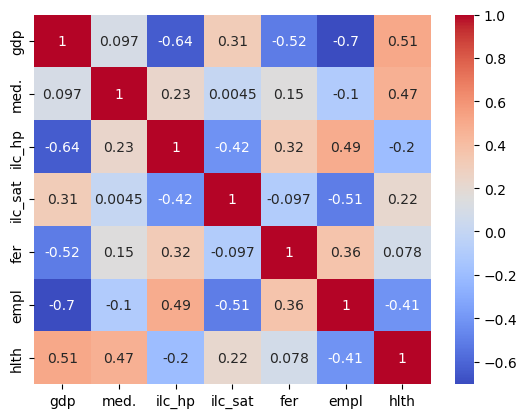

In [14]:
corr = data.corr(method = 'spearman')

sns.heatmap(corr, annot = True, cmap='coolwarm')

plt.show()

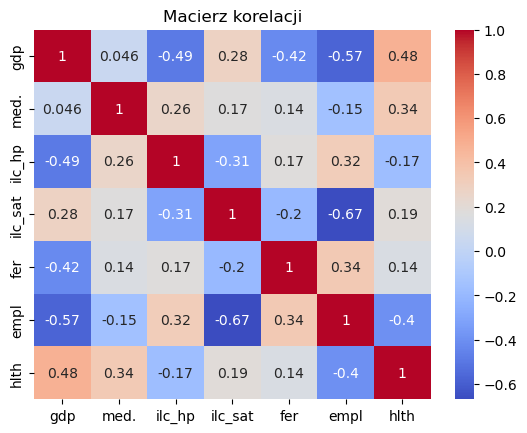

In [15]:
data_corr = data.corr(method = 'pearson')
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

In [16]:
res = stats.pearsonr(data['empl'], data['ilc_sat'])
res

PearsonRResult(statistic=np.float64(-0.6685469868375375), pvalue=np.float64(1.550130457713482e-05))

The Spearman rank correlation matrix and the Perason linear correlation matrix yielded quite varied values. One reason may be the existence of a non-linear relationship <br>
and the previously noted outliers. The selected explanatory variables are weakly correlated with the variable defining life satisfaction, with only empl demonstrating a strong relationship with ilc_sat. <br>
Additionally, some variables are moderately correlated with GDP, which may negatively impact the quality of the model. The fertility rate is weakly correlated with life satisfaction. <br>
**Based on the obtained correlations, it should therefore be concluded that having a child does not significantly affect life satisfaction**.

#### Coefficients of variation

In [17]:
data_zm = data.std() / data.mean() * 100
data_zm

gdp         71.450267
med.       104.486743
ilc_hp      64.464605
ilc_sat      8.707079
fer         22.277867
empl        49.048400
hlth        56.596102
dtype: float64

None of the explanatory variables has a variability lower than 10%, so each of them was included in the linear regression equation.

### Linear regression model

Due to the low correlation of the explanatory variables with life satisfaction, the simple regression equation will probably show the significance of only a few variables.

In [18]:
end_var = data['ilc_sat']
ex_var = data[['gdp', 'med.', 'ilc_hp', 'fer', 'empl', 'hlth']]

In [19]:
ex_var = sm.add_constant(ex_var)

In [20]:
model = sm.OLS(end_var, ex_var).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ilc_sat   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     4.754
Date:                Wed, 24 Sep 2025   Prob (F-statistic):            0.00200
Time:                        11:17:22   Log-Likelihood:                -20.127
No. Observations:                  34   AIC:                             54.25
Df Residuals:                      27   BIC:                             64.94
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7400      0.604     14.465      0.000       7.500       9.980
gdp        -7.046e-06   6.43e-06     -1.095      0.283   -2.02e-05    6.16e-06
med.           0.0521      0.049      1.072      0.293      -0.048       0.152
ilc_hp        -0.1351      0.089     -1.526      0.139      -0.317       0.047
fer           -0.4014      5.770     -0.070      0.945     -12.241      11.438
empl          -0.0610      0.015     -4.191      0.000      -0.091      -0.031
hlth          -0.0390      0.084     -0.463      0.647      -0.212       0.134
==============================================================================
Omnibus:                        5.691   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.129
Skew:                          -0.701   Prob(JB):                        0.127
Kurtosis:                       3.975   Cond. No.                     2.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the estimated model, there is a clear difference between the R-squared and adjusted R-squared values. This suggests that the model included variables that did not significantly improve the model fit. The F-test result indicates that at least one variable in the model is statistically significant. In fact, all variables except empl achieved p-values exceeding the accepted level of 0.05 for the Student's t-test. The birth rate variable was rejected first, due to its significantly higher p-value.

Based on the results of the Jarque-Bera test, the residual distribution is normal. The probability for the Omnibus test tells us that the residual distribution is non-normal with a probability of 0.058.

The normality of the residual distribution allowed us to test for homoscedasticity of the model residuals. The null hypothesis of the White test assumes homoscedasticity of the residuals, which is important for the reliability of the obtained model parameters. A RESET test was also performed to verify whether the appropriate model form had been selected.

**White Test**

In [21]:
exog = model.model.exog
white_test = het_white(model.resid, exog)
labels = ['Test statistic', 'p-value', 'Statystyka F', 'p-value']
print(dict(zip(labels, white_test)))

{'Test statistic': np.float64(28.899894901381124), 'p-value': np.float64(0.4173426057865295), 'Statystyka F': np.float64(1.2592287301516065)}


Based on the p-value, there is no basis to reject the null hypothesis, the residuals in the regression model are homoscedastic.

**RESET test**

In [22]:
data_np = data.to_numpy()
X = data_np[:, [0,1,2,4,5,6]] 
y = data_np[:, 3] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
reset_test = sm.stats.diagnostic.linear_reset(model)
reset_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3.8219998351099775, p-value=0.14793239242067363, df_denom=2>

Based on the p-value, there is no reason to reject the null hypothesis, the linear form of the model is correct.

##### Model 2

The fer variable was rejected due to the highest p-value for the Student's t-test.

In [23]:
end_var_1 = data['ilc_sat']
ex_var_1 = data[['gdp', 'med.', 'ilc_hp', 'empl', 'hlth']]

In [24]:
ex_var_1 = sm.add_constant(ex_var_1)

In [25]:
model_1 = sm.OLS(end_var_1, ex_var_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ilc_sat   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     5.914
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           0.000750
Time:                        11:17:22   Log-Likelihood:                -20.131
No. Observations:                  34   AIC:                             52.26
Df Residuals:                      28   BIC:                             61.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7094      0.407     21.421      0.000       7.876       9.542
gdp        -6.845e-06   5.65e-06     -1.212      0.235   -1.84e-05    4.72e-06
med.           0.0518      0.048      1.090      0.285      -0.046       0.149
ilc_hp        -0.1343      0.086     -1.558      0.131      -0.311       0.042
empl          -0.0612      0.014     -4.428      0.000      -0.090      -0.033
hlth          -0.0415      0.075     -0.555      0.583      -0.195       0.112
==============================================================================
Omnibus:                        5.845   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                4.279
Skew:                          -0.716   Prob(JB):                        0.118
Kurtosis:                       3.986   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing the fer variable had a significantly positive effect on the adjusted R-squared coefficient values. In the next step, the htlh and med factors were rejected. <br>
In this model the residual distribution remains normal and there is no autocorrelation of the residuals.

##### Model 3

In [26]:
end_var_2 = data['ilc_sat']
ex_var_2 = data[['gdp', 'ilc_hp', 'empl']]
ex_var_2 = sm.add_constant(ex_var_2)

model_2 = sm.OLS(end_var_2, ex_var_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ilc_sat   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     9.696
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           0.000124
Time:                        11:17:22   Log-Likelihood:                -20.861
No. Observations:                  34   AIC:                             49.72
Df Residuals:                      30   BIC:                             55.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6937      0.377     23.057      0.000       7.924       9.464
gdp        -7.413e-06   5.24e-06     -1.415      0.167   -1.81e-05    3.29e-06
ilc_hp        -0.1058      0.080     -1.318      0.198      -0.270       0.058
empl          -0.0626      0.013     -4.698      0.000      -0.090      -0.035
==============================================================================
Omnibus:                        5.470   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.903
Skew:                          -0.713   Prob(JB):                        0.142
Kurtosis:                       3.849   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rejecting another variable slightly improved the adjusted R-squared parameter. The value is still small, suggesting the low usefulness of simple regression in explaining the variability of the endogenous variable.

This may be due to the possible homoscedasticity of the explanatory variables and the low correlation of some factors with the dependent variable.

The results of the Omnibus, Durbin-Watson, and JB tests do not change significantly; the conclusions are identical to those in the previously calculated models. Due to the slight improvement in the quality of the next model, it was decided to discontinue rejecting the additional variables.

**White Test**

In [27]:
exog = model_2.model.exog
white_test = het_white(model_2.resid, exog)
labels = ['Test statistic', 'p-value', 'Statystyka F', 'p-value']
print(dict(zip(labels, white_test)))

{'Test statistic': np.float64(5.460656599832525), 'p-value': np.float64(0.8526206897822399), 'Statystyka F': np.float64(0.5102342660343503)}


White's test again confirmed the homoscedasticity of the model residuals.

**RESET test**

In [28]:
data_np = data.to_numpy()
X = data_np[:, [0,2,5]] 
y = data_np[:, 3] 
X = sm.add_constant(X)
model_3 = sm.OLS(y, X).fit()
reset_test = sm.stats.diagnostic.linear_reset(model_3)
reset_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3.253765574775315, p-value=0.19654128118165126, df_denom=2>

The linear form of the model is correct

##### Model 4

Finally, a regression equation was also calculated taking into account only the most strongly correlated employment-related variable.

In [29]:
end_var_3 = data['ilc_sat']
ex_var_3 = data[['empl']]
ex_var_3 = sm.add_constant(ex_var_3)

model_3 = sm.OLS(end_var_3, ex_var_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ilc_sat   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     25.86
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.55e-05
Time:                        11:17:22   Log-Likelihood:                -22.314
No. Observations:                  34   AIC:                             48.63
Df Residuals:                      32   BIC:                             51.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1795      0.190     43.160      0.000       7.793       8.566
empl          -0.0561      0.011     -5.085      0.000      -0.079      -0.034
==============================================================================
Omnibus:                        2.617   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.416
Skew:                          -0.394   Prob(JB):                        0.493
Kurtosis:                       3.616   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected the empl variable parameter is significant. R-squared statistics yielded slightly worse results compared to the other models. It should be concluded that the selected variables insufficiently explain young adults' life satisfaction and do not significantly improve the model's quality.

**White Test**

In [30]:
exog = model_3.model.exog
white_test = het_white(model_3.resid, exog)
labels = ['Test statistic', 'p-value', 'Statystyka F', 'p-value']
print(dict(zip(labels, white_test)))

{'Test statistic': np.float64(2.5750843734959457), 'p-value': np.float64(0.2950024689289097), 'Statystyka F': np.float64(1.2701325363471623)}


The results of White's test indicate that the assumption of homoscedasticity of the model is met.

**RESET test**

In [31]:
data_np = data.to_numpy()
X = data_np[:, 5] 
y = data_np[:, 3] 
X = sm.add_constant(X)
model_3 = sm.OLS(y, X).fit()
reset_test = sm.stats.diagnostic.linear_reset(model_3)
reset_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1.8739704142916018, p-value=0.3918072743540148, df_denom=2>

The p-value obtained from the Regression Equation Specification Error test indicates that the functional form of the model is correct.

#### Cluster analysis

##### K-means

In the first step, variables were standardized and the optimal number of clusters was determined. The gdp and empl variables were omitted from the cluster analysis to reduce the thematic scope of the data and to better match objects to classes based on fewer factors.

In [32]:
os.environ['OMP_NUM_THREADS']='1'
print(os.environ["OMP_NUM_THREADS"])

1


In [33]:
data_drop = data.loc[:,['med.','ilc_hp','ilc_sat','fer','hlth']]
data_drop.head()

,med.,ilc_hp,ilc_sat,fer,hlth
Country,,,,,
Belgium,0.8,1.0,7.6,0.09275,2.7
Bulgaria,0.9,2.3,6.0,0.09683,0.9
Czechia,0.2,1.4,7.8,0.10641,2.3
Denmark,2.8,1.8,7.3,0.09583,6.4
Germany,0.4,0.8,6.6,0.07671,3.2


In [34]:
scaler = StandardScaler() 

data_std = pd.DataFrame(scaler.fit_transform(data_drop),
                               columns=data_drop.columns,
                                 index=data_drop.index)
                               
data_std.head()

,med.,ilc_hp,ilc_sat,fer,hlth
Country,,,,,
Belgium,-0.567423,-0.718003,0.459552,0.449477,0.192545
Bulgaria,-0.516919,0.395531,-2.091432,0.669676,-1.131470
Czechia,-0.870445,-0.375377,0.778425,1.186711,-0.101681
Denmark,0.442649,-0.032751,-0.018757,0.615705,2.914131
Germany,-0.769437,-0.889315,-1.134813,-0.416206,0.560327


In [35]:
score = []
for k in range(2, 8):
    km = KMeans(n_clusters=k,
                 init='random',
                 random_state=15,
                 n_init=20)
    results_km = km.fit(data_std)
    coefficient = silhouette_score(data_std, results_km.labels_)
    score.append(coefficient)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

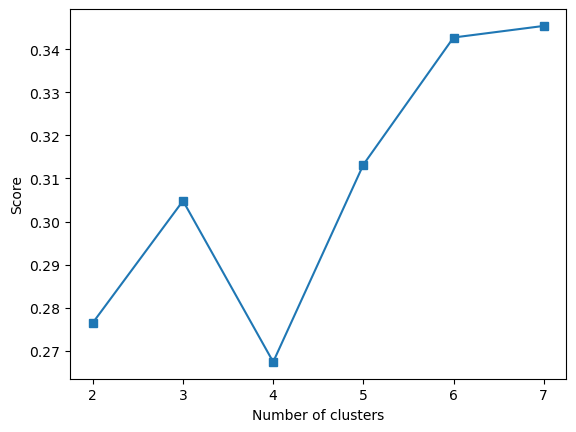

In [36]:
plt.plot(range(2,8), score,
        marker='s')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

Six clusters were selected for analysis. A Silhouette index value of 0.34 indicates an average fit of objects to classes.

In [37]:
kmeans = KMeans(n_clusters=6,
                init='random',
                random_state=15,
                n_init=30)

results = kmeans.fit(data_std)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
results.inertia_

45.91117284343531

In [39]:
df_results = pd.DataFrame(results.cluster_centers_,
                          columns=data_std.columns)
df_results

,med.,ilc_hp,ilc_sat,fer,hlth
0,-0.213898,0.374117,-2.171150,1.192512,-0.726910
1,-0.628027,-0.409639,0.013130,-1.607869,-1.043203
2,2.349161,0.202804,0.579130,0.332362,0.560327
3,0.190131,2.508390,-0.550212,-0.115771,-0.420425
4,-0.473631,-0.405968,0.516494,0.212316,-0.101681
5,0.164879,-0.525276,0.180538,-0.171316,2.141789


In [40]:
results.labels_

array([4, 0, 4, 5, 4, 2, 5, 3, 1, 2, 4, 1, 1, 3, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 2, 5, 2, 5, 4, 0, 0, 3, 0], dtype=int32)

In [41]:
data_drop['skupienie'] = results.labels_

In [42]:
n_rclusters = 6
for i in range(n_rclusters):
    print(f'''Cluster {i} includes the following countries:\
    {data_drop[data_drop['skupienie'] == i].index.values}''')

Cluster 0 includes the following countries:    ['Bulgaria' 'Montenegro' 'North Macedonia' 'Türkiye']
Cluster 1 includes the following countries:    ['Spain' 'Italy' 'Cyprus' 'Luxembourg' 'Malta']
Cluster 2 includes the following countries:    ['Estonia' 'France' 'Finland' 'Iceland']
Cluster 3 includes the following countries:    ['Greece' 'Latvia' 'Serbia']
Cluster 4 includes the following countries:    ['Belgium' 'Czechia' 'Germany' 'Croatia' 'Lithuania' 'Hungary'
 'Netherlands' 'Austria' 'Poland' 'Portugal' 'Romania' 'Slovenia'
 'Slovakia' 'Switzerland']
Cluster 5 includes the following countries:    ['Denmark' 'Ireland' 'Sweden' 'Norway']


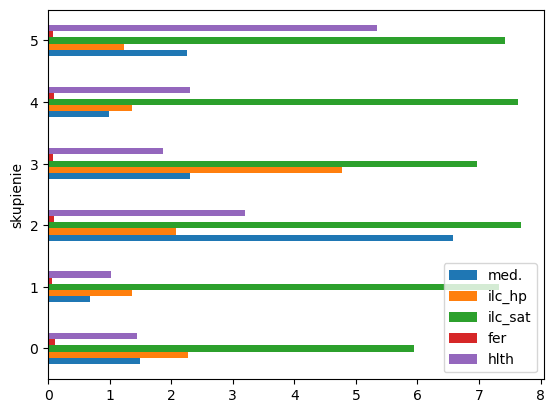

In [43]:
data_drop.groupby('skupienie').mean(numeric_only=True).plot.barh()
plt.show()

Some clusters contain countries that are clearly similar geographically and in terms of economic development. Cluster 0 includes countries with very low GDP per capita and poor macroeconomic data. <br>
Cluster 1 includes most southern countries and highly developed Luxembourg. Cluster 4 is too numerous and not homogeneous, while cluster 5 includes the Nordic countries and Ireland.

Some of the values of the obtained centers of gravity clearly distinguish individual clusters. In the countries of cluster 2, many people complain about the lack of access to medical care due to the cost and distance of travel. <br>
Countries belonging to this cluster also perform poorly in terms of health assessment. The northern countries of cluster 5 perform the worst in terms of this variable. Greece, Lithuania, and Serbia form a cluster of countries with <br>
relatively high life satisfaction, while a significantly higher percentage of people than in the other groups state that they were not happy at all in the last four weeks. The population of the southern countries of cluster 1 <br>
positively assesses their health in the analyzed aspects. The smallest percentage of people complain about poor health, and a small share of the population has problems obtaining health services.

##### Hierarchical clustering

In [44]:
data_ward = linkage(data_std, 
                    method='ward')

set_link_color_palette(['aqua', 'blue', 'magenta', 'orange','red','green'])

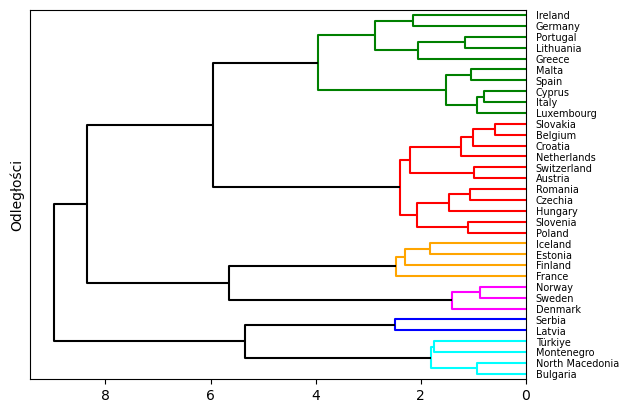

In [45]:
dendrogram(data_ward,
          leaf_rotation=0,
          labels=data.index,
          orientation='left',
          leaf_font_size=7,
          color_threshold=4, 
          above_threshold_color='black') 

plt.ylabel('Odległości')
plt.show()

The clusters created using Ward's method are similar to those created using the k-cluster method. At the selected critical height, six clusters were also created.

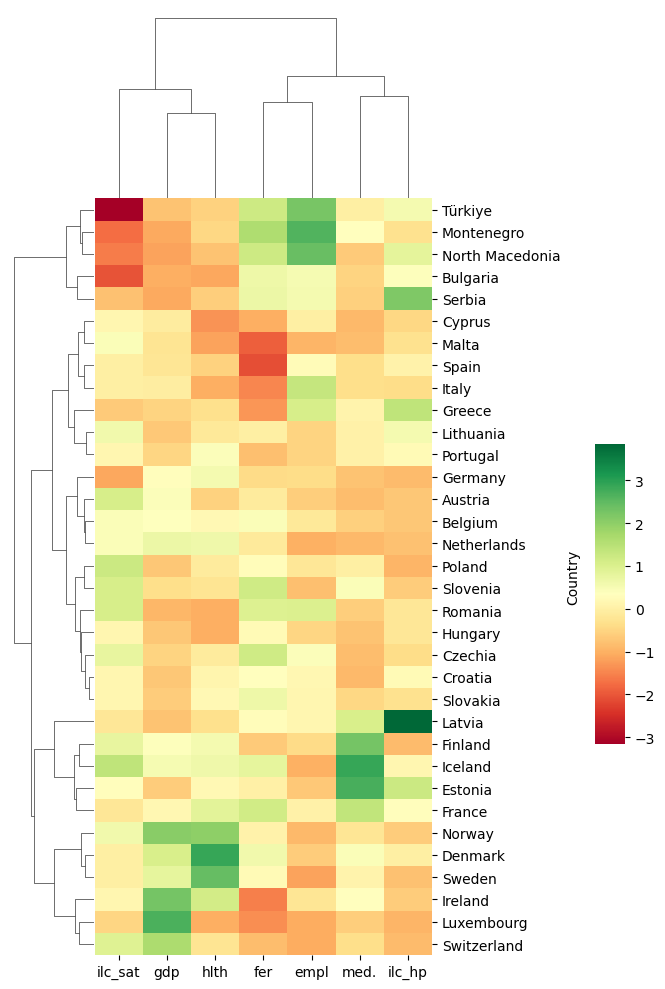

In [46]:
sns.clustermap(data, 
               z_score=1, 
               method='ward',
               cmap='RdYlGn',
               cbar_pos=(1, 0.25, 0.05, 0.3),
               figsize=(6,10))

For variables in most countries, standardized observations take negative values. For the ilc_sat variable the biggest outliers are Turkey, along with Montenegro, North Macedonia, and Bulgaria.<br>
These countries also have the highest rates of unemployed and not attending education young adults.<br>
Luxembourg stands out in terms of the GDP variable, and along with Ireland and Switzerland, they achieve the highest values for the standardized GDP variable.<br>
In terms of the variable concerning the indicator of citizens' health status, the highest values are achieved by the Scandinavian countries, led by Denmark.<br>
Iceland and Estonia are characterized by a high level of citizen satisfaction with medical examinations. Dark green appears for the ilc_hp variable in Latvia.<br>
The variables do not form strongly homogeneous clusters. Interestingly, the ilc_hp and ilc_sat variables concerning life satisfaction were not assigned to a single cluster.

In [47]:
clusters = cut_tree(data_ward, 
                    n_clusters=6)
clusters

array([[0],
       [1],
       [0],
       [2],
       [3],
       [4],
       [3],
       [3],
       [3],
       [4],
       [0],
       [3],
       [3],
       [5],
       [3],
       [3],
       [0],
       [3],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [4],
       [2],
       [4],
       [2],
       [0],
       [1],
       [1],
       [5],
       [1]])

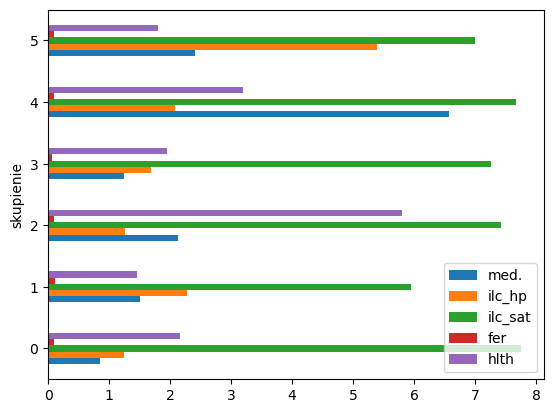

In [48]:
data_drop['skupienie'] = clusters
data_drop.groupby('skupienie').mean(numeric_only=True).plot.barh()
plt.show()

In [49]:
hclusters = 6
for i in range(hclusters):
    print(f'''Cluster {i} includes the following countries:\
    {data_drop[data_drop['skupienie'] == i].index.values}''')

Cluster 0 includes the following countries:    ['Belgium' 'Czechia' 'Croatia' 'Hungary' 'Netherlands' 'Austria' 'Poland'
 'Romania' 'Slovenia' 'Slovakia' 'Switzerland']
Cluster 1 includes the following countries:    ['Bulgaria' 'Montenegro' 'North Macedonia' 'Türkiye']
Cluster 2 includes the following countries:    ['Denmark' 'Sweden' 'Norway']
Cluster 3 includes the following countries:    ['Germany' 'Ireland' 'Greece' 'Spain' 'Italy' 'Cyprus' 'Lithuania'
 'Luxembourg' 'Malta' 'Portugal']
Cluster 4 includes the following countries:    ['Estonia' 'France' 'Finland' 'Iceland']
Cluster 5 includes the following countries:    ['Latvia' 'Serbia']


The graph presents the centers of gravity of variables in six clusters. Cluster number 0 combines countries with high levels of life satisfaction among citizens and relatively low levels of the medical variable.<br>
For cluster 4, the level of satisfaction is also high, while the indicator of poor or very poor health of citizens ranks high in the cluster classification. Cluster number 1 includes countries where citizens are the least satisfied with the standard of living in their country.<br>
These are also the countries with the highest rates of people not working or participating in education.



##### Comparison of cluster analysis results

Both methods resulted in similar, though not identical, clusters. Individual countries change cluster membership for different methods.

Two identical clusters were created:

* Bulgaria, Turkey, North Macedonia, and Montenegro
* Estonia, France, Iceland, and Finland

These identical clusters contain countries with strong similarities in the selected indicators and statistics. The first group is also culturally similar, as three are Balkan countries. In contrast, the second group consists of countries that are more diverse, both geographically and culturally. Moreover, the average Silhouette index value obtained for the k-means method indicates an average fit between countries and clusters, which could have made the results difficult to interpret.

Countries that "changed" their cluster include Germany and Ireland.

#### Summary

Based on the analysis, it should be concluded that the selected factors do not significantly explain the assessment of life satisfaction among people aged 25-34. This may be due to the fact that the selection of variables was based on studies that did not distinguish between age groups. An additional limitation was the availability of data itself, which often concerned similar, but not identical, age groups. The question of whether life satisfaction and high fertility among young adults are closely related was not answered affirmatively. The Pearson-Spearman correlation coefficient was too low to indicate a clear relationship.

The classification yielded few clusters containing countries with similar characteristics. The most similar group included Bulgaria, Turkey, North Macedonia, and Montenegro.

These countries clearly stood out due to their citizens' low life satisfaction. The cluster containing Estonia, France, Finland, and Iceland shares a high level of economic development.